In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from KDEpy import FFTKDE

from KDEpy.bw_selection import improved_sheather_jones as ISJ

from scipy import stats

In [13]:
import os
figdst = os.path.expanduser('~') + '/documents/website/tda/figs' + os.sep
fs = 12
ext = '.pdf'
figsize=(6,4)
marker = '|'
alpha = 1

markers = ['D', '8', 's', '^', 'v', 'P', 'X', '*']
colors = ['#56b4e9', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#e69f00', '#f0e442', '#000000', '#e0e0e0']
color = 'darkblue'

In [14]:
xlim = 10
sz = 0.5
bins = np.arange(-xlim, xlim+0.1, sz)
rng = np.random.default_rng(42)

x1 = rng.normal(loc=0, scale=1.25, size=150)
x2 = rng.normal(loc=-5, scale=2, size=100)
x3 = rng.normal(loc=4, scale=0.5, size=50)
x = np.sort(np.hstack((x1,x2,x3)))
print(np.sum( np.abs(x)>=xlim))

bw = sz
xaxis = np.linspace(-xlim,xlim,512)
y = FFTKDE(bw=bw).fit(x).evaluate(xaxis)

yy = []
for xx in [x2, x1, x3, x]:
    yy.append(FFTKDE(bw=bw).fit(xx).evaluate(xaxis))

0


/home/eah4d/documents/website/tda/figs/kernel_density_estimator_00.pdf


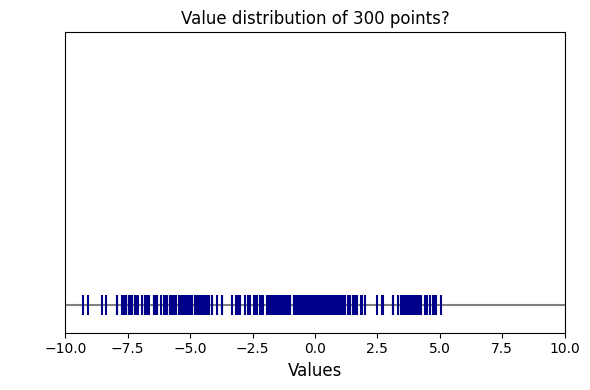

In [15]:
fig, ax = plt.subplots(1,1,figsize=figsize)
ax = np.atleast_1d(ax).ravel(); i=0

ax[i].axhline(0, c='gray', zorder=1)
ax[i].scatter(x,np.zeros(len(x)), marker=marker, color=color, alpha=alpha, zorder=2, s=200)
ax[i].set_xlim(-xlim,xlim)
ax[i].set_ylim(-0.1,1)

ax[i].tick_params('y', colors='w')
ax[i].set_ylabel('Frequency', fontsize=fs, c='b', alpha=0)
ax[i].set_xlabel('Values', fontsize=fs)
ax[i].set_title('Value distribution of {} points?'.format(len(x)), fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_00' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_01.pdf


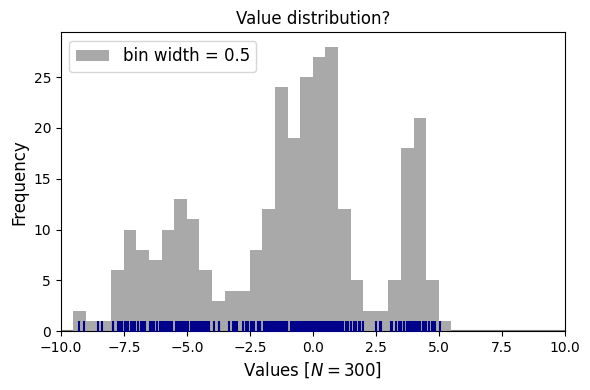

In [16]:
fig, ax = plt.subplots(1,1,figsize=figsize); ax = np.atleast_1d(ax).ravel(); i=0

ax[i].axhline(0, c='gray', zorder=1)
ax[i].scatter(x,np.zeros(len(x)), marker=marker, color=color, alpha=alpha, zorder=4, s=200)
hist, bins, patches = ax[i].hist(x, bins=bins, color='darkgray', label='bin width = {}'.format(sz))
ax[i].legend(loc='upper left', fontsize=fs)
ax[i].set_xlim(-xlim,xlim)
#ax[i].set_ylim(-0.1,1)

ax[i].tick_params('y', colors='k')
ax[i].set_ylabel('Frequency', fontsize=fs, c='k', alpha=1)
ax[i].set_xlabel('Values [$N = {}$]'.format(len(x)), fontsize=fs)
ax[i].set_title('Value distribution?'.format(len(x)), fontsize=fs)


fig.tight_layout();
filename = figdst + 'kernel_density_estimator_01' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_02.pdf


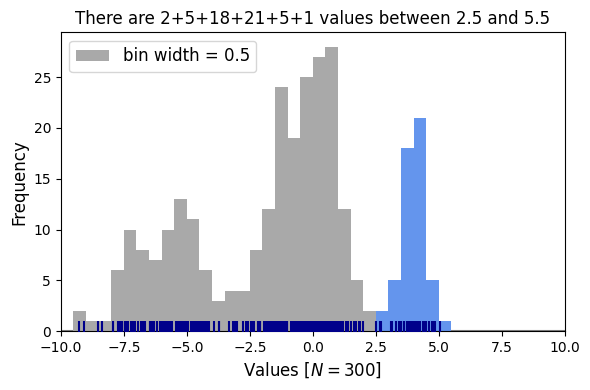

In [17]:
fig, ax = plt.subplots(1,1,figsize=figsize); ax = np.atleast_1d(ax).ravel(); i=0

ax[i].axhline(0, c='gray', zorder=1)
ax[i].scatter(x,np.zeros(len(x)), marker=marker, color=color, alpha=alpha, zorder=4, s=200)
hist, bins, patches = ax[i].hist(x, bins=bins, color='darkgray', label='bin width = {}'.format(sz))
ax[i].legend(loc='upper left', fontsize=fs)

ax[i].set_xlim(-xlim,xlim)
focus = np.nonzero( (bins >= 2.5) & (bins < 5.5))[0]
for j in focus:
    patches.patches[j].set_facecolor('cornflowerblue')

title = '+'.join(['{}' for _ in range(len(focus))])
title = 'There are ' + title.format(*hist[focus].astype(int)) + ' values between 2.5 and 5.5'
ax[i].tick_params('y', colors='k')
ax[i].set_ylabel('Frequency', fontsize=fs, c='k', alpha=1)
ax[i].set_xlabel('Values [$N = {}$]'.format(len(x)), fontsize=fs)
ax[i].set_title(title, fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_02' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_03.pdf


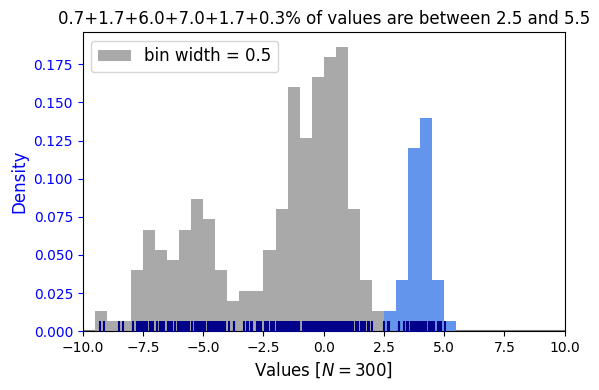

In [18]:
fig, ax = plt.subplots(1,1,figsize=figsize); ax = np.atleast_1d(ax).ravel(); i=0

ax[i].axhline(0, c='gray', zorder=1)
ax[i].scatter(x,np.zeros(len(x)), marker=marker, color=color, alpha=alpha, zorder=4, s=200)
hist, bins, patches = ax[i].hist(x, bins=bins, color='darkgray', label='bin width = {}'.format(sz), density=True)
ax[i].legend(loc='upper left', fontsize=fs)

ax[i].set_xlim(-xlim,xlim)
focus = np.nonzero( (bins >= 2.5) & (bins < 5.5))[0]
for j in focus:
    patches.patches[j].set_facecolor('cornflowerblue')

title = '+'.join(['{:.1f}' for _ in range(len(focus))])
title = title.format(*(100*hist[focus]*sz)) + '% of values are between 2.5 and 5.5'
ax[i].tick_params('y', colors='b')
ax[i].set_ylabel('Density', fontsize=fs, c='b', alpha=1)
ax[i].set_xlabel('Values [$N = {}$]'.format(len(x)), fontsize=fs)
ax[i].set_title(title, fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_03' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_04.pdf


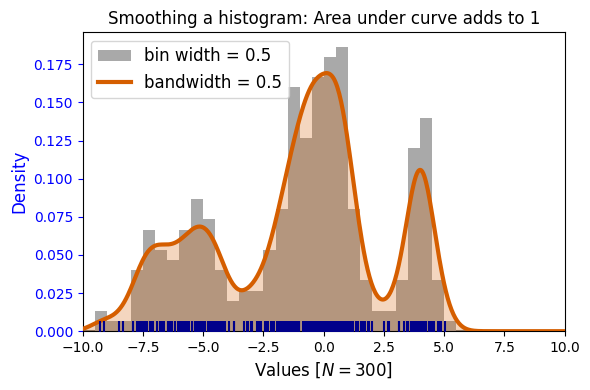

In [19]:
fig, ax = plt.subplots(1,1,figsize=figsize); ax = np.atleast_1d(ax).ravel(); i=0

ax[i].axhline(0, c='gray', zorder=1)
ax[i].scatter(x,np.zeros(len(x)), marker=marker, color=color, alpha=alpha, zorder=4, s=200)
hist, bins, patches = ax[i].hist(x, bins=bins, color='darkgray', label='bin width = {:.1f}'.format(sz), density=True)
ax[i].plot(xaxis, y, color=colors[3], lw=3, label='bandwidth = {:.1f}'.format(sz), zorder=3 )
ax[i].fill_between(xaxis, y, color=colors[3], alpha=0.25, zorder=2)
ax[i].legend(loc='upper left', fontsize=fs)

ax[i].set_xlim(-xlim,xlim)
focus = np.nonzero( (bins >= 2.5) & (bins < 5.5))[0]

ax[i].tick_params('y', colors='b')
ax[i].set_ylabel('Density', fontsize=fs, c='b', alpha=1)
ax[i].set_xlabel('Values [$N = {}$]'.format(len(x)), fontsize=fs)
ax[i].set_title('Smoothing a histogram: Area under curve adds to 1', fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_04' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_05.pdf


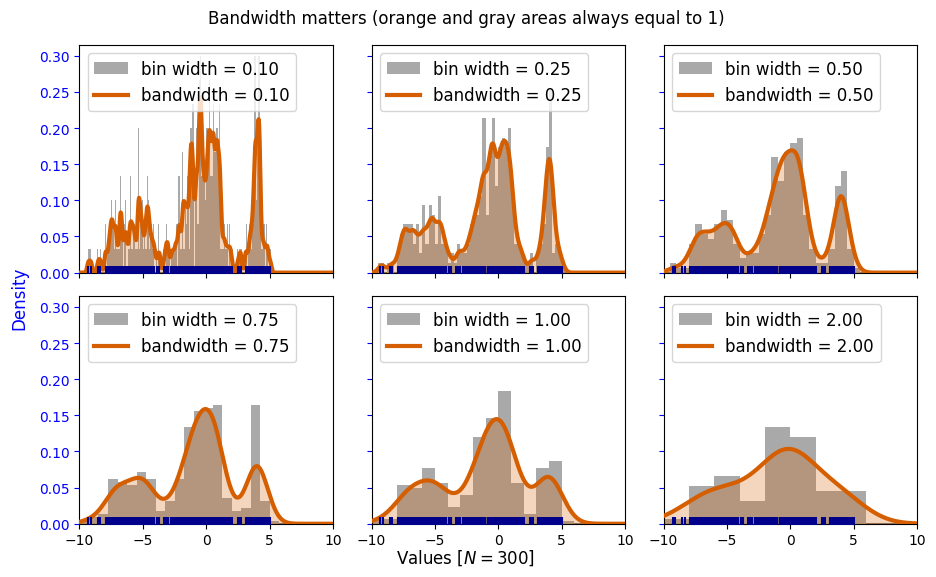

In [20]:
fig, ax = plt.subplots(2,3,figsize=(9.5,6), sharex=True, sharey=True); 
ax = np.atleast_1d(ax).ravel(); i=0

for i,szs in enumerate([0.1, 0.25, 0.5, 0.75, 1, 2]):
    
    y = FFTKDE(bw=szs).fit(x).evaluate(xaxis)
    
    ax[i].axhline(0, c='gray', zorder=1)
    ax[i].scatter(x,np.zeros(len(x)), marker=marker, color=color, alpha=alpha, zorder=4, s=100)
    
    ax[i].hist(x, bins=np.arange(-xlim, xlim+szs, szs), color='darkgray', label='bin width = {:.2f}'.format(szs), density=True)
    ax[i].plot(xaxis, y, color=colors[3], lw=3, label='bandwidth = {:.2f}'.format(szs), zorder=3 )
    ax[i].fill_between(xaxis, y, color=colors[3], alpha=0.25, zorder=2)
    ax[i].legend(loc='upper left', fontsize=fs)
    
    ax[i].set_xlim(-xlim,xlim)
    
    ax[i].tick_params('y', colors='b')

fig.supylabel('Density', fontsize=fs, c='b', alpha=1)
fig.supxlabel('Values [$N = {}$]'.format(len(x)), fontsize=fs, y=0.05)
fig.suptitle('Bandwidth matters (orange and gray areas always equal to 1)', fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_05' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

# Combine KDEs

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_06.pdf


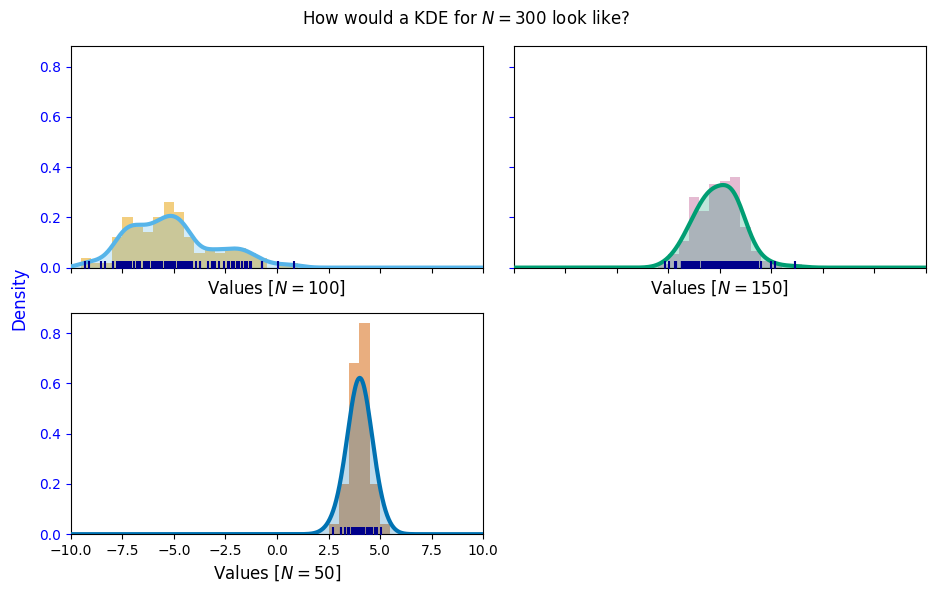

In [21]:
bw = 0.5

fig, ax = plt.subplots(2,2,figsize=(9.5,6), sharex=True, sharey=True); 
ax = np.atleast_1d(ax).ravel(); i=0

for i,xx in enumerate([x2, x1, x3]):
    
    ax[i].scatter(xx,np.zeros(len(xx)), marker=marker, color=color, alpha=alpha, zorder=4, s=100)
    ax[i].hist(xx, bins=bins, color=colors[-i-4], alpha=0.5, density=True)
    ax[i].plot(xaxis, yy[i], color=colors[i], lw=3, zorder=3 )
    ax[i].fill_between(xaxis, yy[i], color=colors[i], alpha=0.25, zorder=2)
    ax[i].set_xlabel('Values [$N = {}$]'.format(len(xx)), fontsize=fs)
    ax[i].set_xlim(-xlim,xlim)
    ax[i].tick_params('y', colors='b')

fig.delaxes(ax[-1])
fig.supylabel('Density', fontsize=fs, c='b', alpha=1)
fig.suptitle('How would a KDE for $N = {}$ look like?'.format(len(x)), fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_06' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_07.pdf


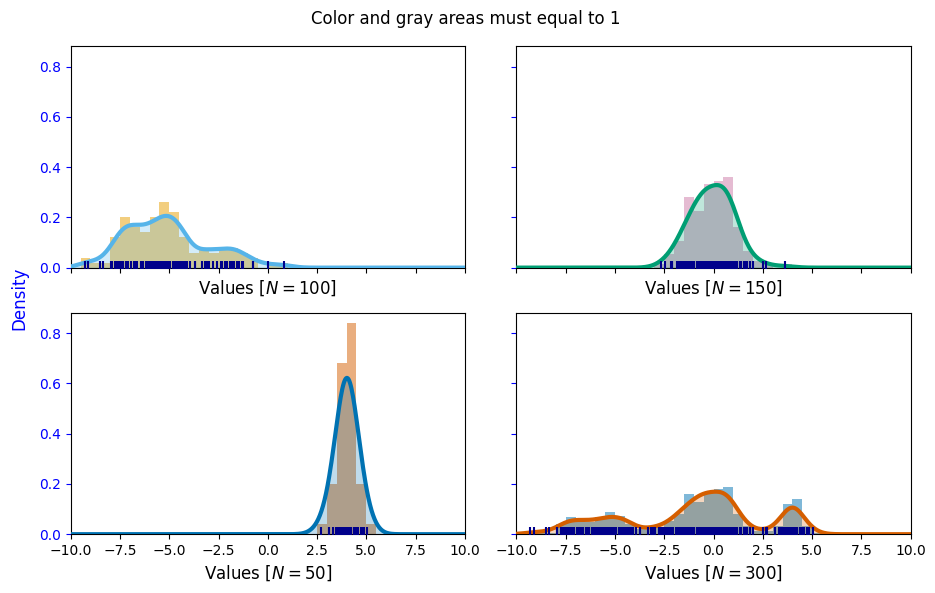

In [22]:
bw = 0.5

fig, ax = plt.subplots(2,2,figsize=(9.5,6), sharex=True, sharey=True); 
ax = np.atleast_1d(ax).ravel(); i=0

for i,xx in enumerate([x2, x1, x3, x]):
    
    ax[i].scatter(xx,np.zeros(len(xx)), marker=marker, color=color, alpha=alpha, zorder=4, s=100)
    ax[i].hist(xx, bins=bins, color=colors[-i-4], alpha=0.5, density=True)
    ax[i].plot(xaxis, yy[i], color=colors[i], lw=3, zorder=3 )
    ax[i].fill_between(xaxis, yy[i], color=colors[i], alpha=0.25, zorder=2)
    ax[i].set_xlabel('Values [$N = {}$]'.format(len(xx)), fontsize=fs)
    ax[i].set_xlim(-xlim,xlim)
    ax[i].tick_params('y', colors='b')

fig.supylabel('Density', fontsize=fs, c='b', alpha=1)
fig.suptitle('Color and gray areas must equal to 1', fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_07' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

/home/eah4d/documents/website/tda/figs/kernel_density_estimator_08.pdf


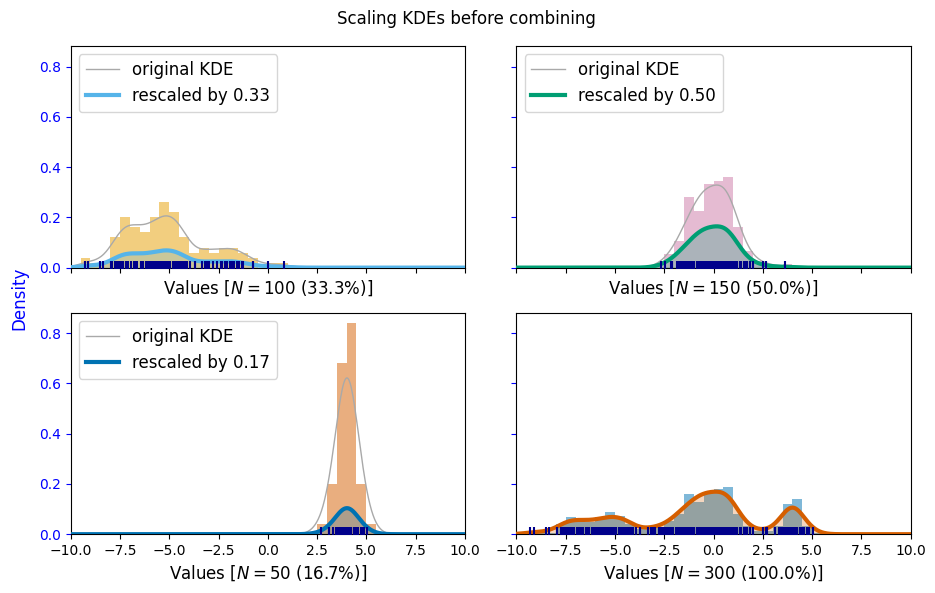

In [23]:
bw = 0.5

fig, ax = plt.subplots(2,2,figsize=(9.5,6), sharex=True, sharey=True); 
ax = np.atleast_1d(ax).ravel(); i=0

for i,xx in enumerate([x2, x1, x3, x]):

    ax[i].scatter(xx,np.zeros(len(xx)), marker=marker, color=color, alpha=alpha, zorder=4, s=100)
    ax[i].hist(xx, bins=bins, color=colors[-i-4], alpha=0.5, density=True)
    ax[i].plot(xaxis, yy[i], color='darkgray', lw=1, zorder=2, label='original KDE' )
    ax[i].plot(xaxis, yy[i]*len(xx)/len(x), color=colors[i], lw=3, zorder=3, label='rescaled by {:.2f}'.format(len(xx)/len(x)) )
    ax[i].fill_between(xaxis, yy[i]*len(xx)/len(x), color=colors[i], alpha=0.25, zorder=2)
    ax[i].set_xlabel('Values [$N = {}$ ({:.1f}%)]'.format(len(xx), 100*len(xx)/len(x)), fontsize=fs)
    ax[i].set_xlim(-xlim,xlim)
    ax[i].tick_params('y', colors='b')
for i in range(3):
    ax[i].legend(loc='upper left', fontsize=fs)
    
fig.supylabel('Density', fontsize=fs, c='b', alpha=1)
fig.suptitle('Scaling KDEs before combining', fontsize=fs)

fig.tight_layout();
filename = figdst + 'kernel_density_estimator_08' + ext
print(filename)
plt.savefig(filename, bbox_inches='tight')

```
set.seed(17)
x <- rexp(1000)
#
# Compute a bandwidth.
#
h <- density(x, kernel="gaussian")$bw # $
#
# Compute edge weights.
#
w <- 1 / pnorm(0, mean=x, sd=h, lower.tail=FALSE)
#
# The truncated weighted density is what we want.
#
d <- density(x, bw=h, kernel="gaussian", weights=w / length(x))
d$y[d$x < 0] <- 0
#
# Check: the integral ought to be close to 1:
#
sum(d$y * diff(d$x)[1])
#
# Plot the two density estimates.
#
par(mfrow=c(1,1))
plot(d, type="n", main="Default and truncated densities", xlim=c(-1, 5))
polygon(density(x, kernel="gaussian", bw=h), col="#6060ff80", border=NA)
polygon(d, col="#ff606080", border=NA)
curve(exp(-x), from=0, to=max(x), lty=2, add=TRUE)
```

In [17]:
xaxis, step = np.linspace(-4,15, 1024, retstep=True)
print(step)
bw = 2
x = np.sort(np.random.default_rng(42).exponential(scale=1, size=100)) + 1
w = 1/(1 - stats.norm.cdf(1, loc=x, scale=bw))

y0 = FFTKDE(bw=bw).fit(x).evaluate(xaxis)

y = FFTKDE(bw=bw).fit(x, w).evaluate(xaxis)
y[xaxis < 1] = 0
y = y/np.sum(step*y)

print(np.sum(step*y0), np.sum(step*y))

0.01857282502443793
0.9973549842233382 0.9999999999999998


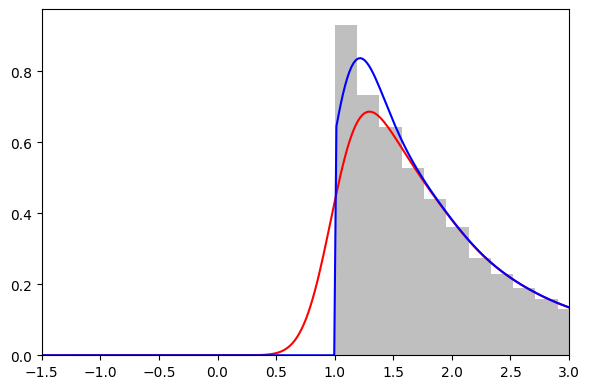

In [66]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.hist(x, bins=50, density=True, color='gray', alpha=0.5)
ax.plot(xaxis, y0, c='r')
ax.plot(xaxis, y, c='b')
ax.set_xlim(-1.5,3)

fig.tight_layout()

In [136]:
xaxis, step = np.linspace(-1,2, 1024, retstep=True)
bw = 0.05
x = np.sort(np.random.default_rng(42).beta(a=0.5, b=0.5, size=10000))

w = stats.norm.cdf(1, loc=x, scale=bw) - stats.norm.cdf(0, loc=x, scale=bw)
w = 1/w

0.9999982535195573 1.0


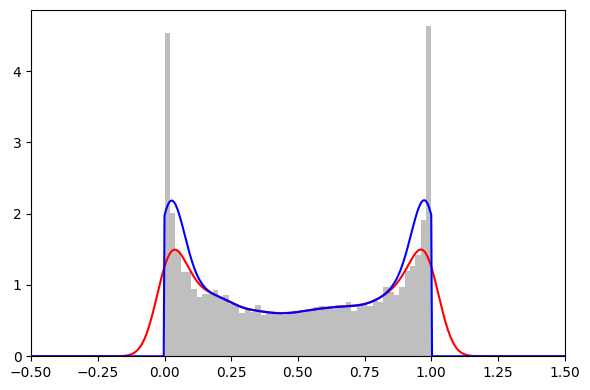

In [137]:
y0 = FFTKDE(bw=bw).fit(x).evaluate(xaxis)
y = FFTKDE(bw=bw).fit(x, w).evaluate(xaxis)

y[xaxis < 0] = 0
y[xaxis > 1] = 0
y = y/np.sum(step*y)

print(np.sum(step*y0), np.sum(step*y))

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.hist(x, bins=50, density=True, color='gray', alpha=0.5)
ax.plot(xaxis, y0, c='r')
ax.plot(xaxis, y, c='b')
ax.set_xlim(-.5,1.5)

fig.tight_layout()

In [192]:
xaxis, step = np.linspace(-3,5, 1024, retstep=True)
bw = 0.1
N = 15000

x = np.random.default_rng(42).gamma(1.2,1,size=N)
x = x[ (x < 0.5)  | (x > 1) ]
x = x[ x < 2 ]

In [193]:
w = stats.norm.cdf(2, loc=x, scale=bw) - stats.norm.cdf(0, loc=x, scale=bw)
w -= (stats.norm.cdf(1, loc=x, scale=bw) - stats.norm.cdf(0.5, loc=x, scale=bw))
w = 1/w

0.9999967470594158 1.0


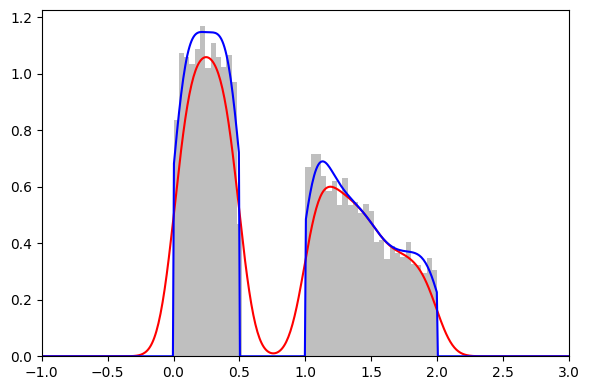

In [194]:
y0 = FFTKDE(kernel='gaussian', bw=bw).fit(x).evaluate(xaxis)
y = FFTKDE(kernel='gaussian', bw=bw).fit(x, w).evaluate(xaxis)

y[xaxis < 0] = 0
y[xaxis > 2] = 0
y[(xaxis > 0.5) & (xaxis < 1) ] = 0
y = y/np.sum(step*y)

print(np.sum(step*y0), np.sum(step*y))

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.hist(x, bins=50, density=True, color='gray', alpha=0.5)
ax.plot(xaxis, y0, c='r')
ax.plot(xaxis, y, c='b')
ax.set_xlim(-1,3)

fig.tight_layout()

# Go to 2D

In [353]:
pows2 = 2**np.arange(20) + 1
pad = 0.025
cy,cx = 6,6
cx += int(np.where( cx % pad, cx%pad, pad))
cy += int(np.where( cy % pad, cy%pad, pad))

xaxis = np.arange(0, cx, pad)
yaxis = np.arange(0, cy, pad)
mx = np.nonzero(pows2 > 1.5*len(xaxis))[0][0]
my = np.nonzero(pows2 > 1.5*len(yaxis))[0][0]

foo = pows2[mx] - len(xaxis)
xneg = foo//2
if foo % 2 == 0:
    xpos = foo//2
else:
    xpos = foo//2 + 1

foo = pows2[my] - len(yaxis)
yneg = foo//2
if foo % 2 == 0:
    ypos = foo//2
else:
    ypos = foo//2 + 1

xaxes = np.hstack((np.arange(-xneg, 0, 1)*pad, xaxis, np.arange(len(xaxis), len(xaxis)+xpos, 1)*pad))
yaxes = np.hstack((np.arange(-yneg, 0, 1)*pad, yaxis, np.arange(len(yaxis), len(yaxis)+ypos, 1)*pad))
X,Y = np.meshgrid(xaxis, yaxis)
XX, YY = np.meshgrid(xaxes, yaxes)

grid = np.column_stack((np.ravel(XX, 'F'), np.ravel(YY, 'F')))

In [372]:
x = np.random.default_rng(42).normal(1.05, 0.75, size=(7500,2))
x = x[np.all(x > 1, axis=1) & np.all(x < 5, axis=1)]
print(x.shape)

(2068, 2)


In [373]:
w = stats.norm.cdf(5, loc=x, scale=bw) - stats.norm.cdf(1, loc=x, scale=bw)
w = np.prod(w, axis=1)
w = 1/w

In [380]:
bw = 0.2
kde = FFTKDE(kernel='gaussian', bw=bw, norm=2).fit(x,w).evaluate(grid)
print(np.sum(kde)*pad**2)

mask = (grid[:,0] >= 0) & (grid[:,0] < cx) & (grid[:,1] >= 0) & (grid[:,1] < cy)
kde = kde[mask]/(np.sum(kde[mask])*pad**2)
kde = kde.reshape( ( len(yaxis), len(xaxis) ), order='F')
print(np.sum(kde)*pad**2)

kde[(X < 1) | (Y < 1)] = 0
kde = kde/(np.sum(kde)*pad**2)

0.9999820405087706
1.0000000000000004


In [383]:
kde0 = FFTKDE(kernel='gaussian', bw=bw, norm=2).fit(x).evaluate(grid)
print(np.sum(kde0)*pad**2)
kde0 = kde0[mask]/(np.sum(kde0[mask])*pad**2)
kde0 = kde0.reshape( ( len(yaxis), len(xaxis) ), order='F')
print(np.sum(kde)*pad**2)

kde0[(X < 1) | (Y < 1)] = 0
kde0 = kde0/(np.sum(kde0)*pad**2)

0.9999820405087706
1.0000000000000002


In [390]:
pd.Series((kde-kde0).ravel()).describe()

count    5.760000e+04
mean     6.437945e-18
std      1.385421e-02
min     -6.630756e-02
25%     -1.469446e-08
50%      0.000000e+00
75%      1.090100e-17
max      2.150584e-01
dtype: float64

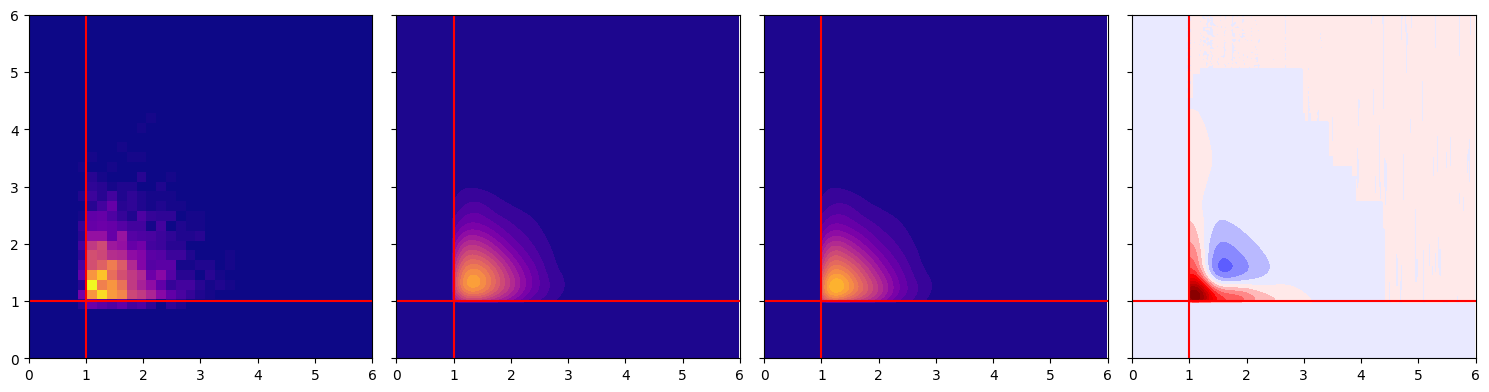

In [412]:
fs = 15
fig, ax = plt.subplots(1,4,figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

#ax[0].scatter(x[:,0], x[:,1], c='b', alpha=0.1, marker='.')
foo = ax[0].hist2d(x[:,0], x[:,1], bins = (35,35), range=((0,6),(0,6)), density=True, cmap='plasma')
vmax = np.max(foo[0])
ax[1].contourf(X,Y, kde0, 16, cmap='plasma', vmin=0, vmax=vmax, zorder=1)
ax[2].contourf(X,Y, kde, 16, cmap='plasma', vmin=0, vmax=vmax, zorder=1)
ax[3].contourf(X,Y, kde-kde0, 16, cmap='seismic', vmin=-0.22, vmax=0.22, zorder=1)


for i in range(len(ax)):
    ax[i].set_aspect('equal')
    ax[i].axhline(1, c='r');ax[i].axvline(1, c='r')
    #ax[i].set_xlim(0,6); ax[i].set_ylim(0,6)

fig.tight_layout();

# Combine two KDEs

In [7]:
xaxis, step = np.linspace(-10,10, 1024, retstep=True)
print(step)
N = 10000
r = 0.4
x1 = np.random.default_rng(42).triangular(-5,-2,0,size=int(r*N))
x2 = np.random.default_rng(42).triangular(4,4.5,5,size=int((1-r)*N))
x = np.hstack((x1, x2))

bw = 0.25

y = FFTKDE(bw=bw, kernel='gaussian').fit(x).evaluate(xaxis)*100
print(np.sum(step*y), y.max(), sep='\t')

0.019550342130987292
99.99901071692852	73.19348288421583


In [8]:
y1 = FFTKDE(bw=bw, kernel='gaussian').fit(x1).evaluate(xaxis)*100
y1 = r*y1#/np.sum(step*y1)
print(np.sum(step*y1), y1.max(), sep='\t')

y2 = FFTKDE(bw=bw, kernel='gaussian').fit(x2).evaluate(xaxis)*100
y2 = (1-r)*y2#/np.sum(step*y2)
print(np.sum(step*y2), y2.max(), sep='\t')

39.999604286771415	14.571385703502736
59.99940643015712	73.19348288421581


In [4]:
y2.max()*r

0.2927739315368633

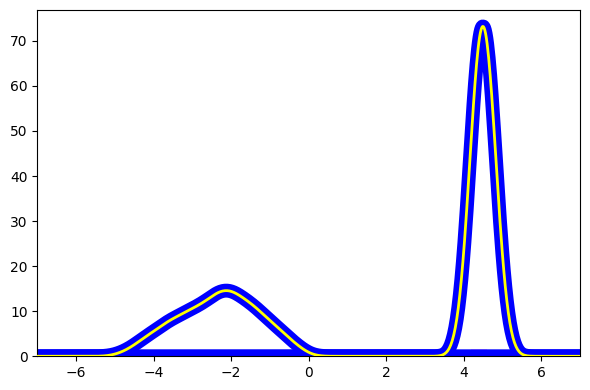

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

_,bins,_ = ax.hist(x, bins=25, density=True, color='gray', alpha=0.75)
_,bins,_ = ax.hist(x1, bins=bins, density=True, color='magenta', alpha=0.25)
_,bins,_ = ax.hist(x2, bins=bins, density=True, color='magenta', alpha=0.25)
ax.plot(xaxis, y1, c='b', lw=10, zorder=2)
ax.plot(xaxis, y2, c='b', lw=10, zorder=2)
ax.plot(xaxis, y, c='yellow', lw=2, zorder=3)
ax.set_xlim(-7,7)

fig.tight_layout()